# Regularized Logistic Regression Model
## Justin Heer, Simon Fraser University

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import f1_score,classification_report, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%config Completer.use_jedi = False

Define the custom loss function

In [2]:
def custom_loss(y_true, y_pred):
    r = recall_score(y_true, y_pred)
    p = precision_score(y_true, y_pred)
    
    return r*0.6 + p*0.4

In [3]:
df = pd.read_csv(r"database\\processed-data.csv",index_col=0)

#### Tuning on multiple random samples of the data, iterate through the hyperparameters one by one, following the coordinate descent method 

In [5]:
inx1 = df['stroke'] ==1
stroke_df = df.loc[inx1,:]
C = np.linspace(0.75,1.2,1000)
scores = []
for i in range(0,50):
    if i%10==0:
        print(f"current iteration is {i}")
    no_stroke_df = df.loc[~inx1,:].sample(247)

    df_sample = pd.concat((stroke_df,no_stroke_df))
    y = df_sample['stroke']
    X = df_sample.drop('stroke', axis=1).values
    
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
    X_val, X_test, y_val, y_test = train_test_split(X_val,y_val,test_size=0.2,random_state=1)

    score = []
    for c in C:
        model = LogisticRegression(
            C=0.03,
            max_iter = 1000,
            n_jobs=1,
            random_state=1,
            solver = 'liblinear',
            fit_intercept = True,
            intercept_scaling = c,
            penalty = 'l2',
            
        )
            
        model.fit(X_train,y_train)

        y_pred = model.predict(X_val)
        score.append(custom_loss(y_val,y_pred))
    scores.append(score)
    

current iteration is 0
current iteration is 10
current iteration is 20
current iteration is 30
current iteration is 40


Tally up scores and then plot for each run

In [267]:
scores = np.array(scores)
mean_score = scores.mean(axis=0)

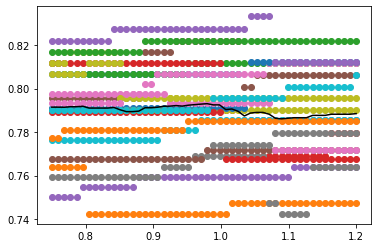

In [268]:
for score in scores:
    plt.plot(C,score,'o')
plt.plot(C,mean_score,'-k')


#### Test the hyperparameters on the test data

In [29]:
inx1 = df['stroke'] ==1
stroke_df = df.loc[inx1,:]
scores = []
recalls = []
precs = []
for i in range(0,50):
    if i%10==0:
        print(f"current iteration is {i}")
    no_stroke_df = df.loc[~inx1,:].sample(247)

    df_sample = pd.concat((stroke_df,no_stroke_df))
    y = df_sample['stroke']
    X = df_sample.drop('stroke', axis=1).values
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

    model = LogisticRegression(
            C=0.03,
            max_iter = 4000,
            random_state=1,
            solver = 'liblinear',
            fit_intercept = True,
            intercept_scaling = 0.9,
            penalty = 'l2',
            tol = 1e-14,
        )
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    scores.append(custom_loss(y_test,y_pred))
    recalls.append(recall_score(y_test,y_pred))
    precs.append(precision_score(y_test,y_pred))
scores = np.array(scores)
recalls = np.array(recalls)
precs = np.array(precs)

current iteration is 0
current iteration is 10
current iteration is 20
current iteration is 30
current iteration is 40
Wall time: 299 ms


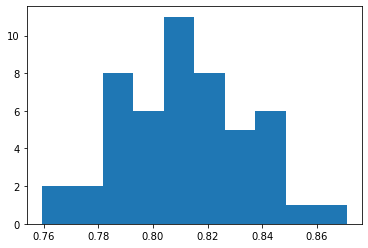

In [295]:
plt.hist(scores, bins=10)
plt.show()

In [6]:
recalls.mean()

0.9297674418604653

In [7]:
precs.mean()

0.6232469764984276

In [8]:
scores.mean()

0.80715925571565